<a href="https://colab.research.google.com/github/shubham-maral/Exploratory_Data_Analysis-Hotel_Booking_Analysis/blob/main/Project_EDA_Hotel_Booking_Analysis_by_Shubham_Maral_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Project Info -**

##**> Project Name**    - **Hotel Booking Analysis**



  **Project Type**    - EDA

  **Contribution**    - Shubham Maral (Individual)


## **> Project Summary -**

Do you know about the factors that influence hotel booking rates and the best strategies to optimize your stay? This data-driven exploratory analysis project aims to answer such questions using a comprehensive hotel booking dataset.

  The dataset at hand comprises booking information for both a city hotel and a resort hotel. It offers a wealth of valuable information, including the booking dates, length of stay, number of adults, children, and babies, and the availability of parking spaces, among other relevant variables. Importantly, all personally identifying information has been meticulously removed to ensure data privacy and anonymity.

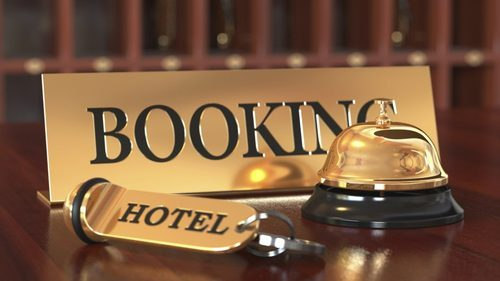

## **> My GitHub Link -**

https://github.com/shubham-maral/Exploratory_Data_Analysis-Hotel_Booking_Analysis/tree/3ff73ccbeba6f52d186b920f51f68c77c08525b8

# ***# Let's Begin !***

## ***1. Importing Libraries, Dataset Loading***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
#import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#from datetime import datetime
#from datetime import date
#import folium
#import plotly.express as px

### Dataset Loading

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
hdf= pd.read_csv('/content/drive/MyDrive/CapstoneProjects/2_EDA_HotelBookingAnalysis/HotelBookings.csv')


\



---



## ***2. Exploring data***

In [ ]:
hdf.head()

In [ ]:
hdf.tail()

In [ ]:
hdf.shape

In [ ]:
hdf.info()

In [ ]:
hdf.describe()

In [ ]:
hdf.columns

\

**> Lets explore each column in detail**

In [ ]:
# Create an empty list to store column information
column_info = []

# Iterate through each column in the DataFrame 'hdf'
for name in hdf.columns:
    # Calculate column information
    dtype = hdf[name].dtypes
    null_count = hdf[name].isnull().sum()
    null_percentage = round(null_count / len(hdf) * 100, 2)
    n_unique = hdf[name].nunique()
    unique_values = hdf[name].unique()

    # Append column information to the list
    column_info.append([name, dtype, null_count, null_percentage, n_unique, unique_values])

# Create a DataFrame with the column information
df_columns = pd.DataFrame(column_info, columns=['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])

df_columns

\

- - - - - - - - - -

## ***3. Cleaning data***

**Steps include :**

    0.Making Copy of original databasez

    1.Remove duplicate rows

    2.Handling missing values.

    3.Convert columns to appropriate datatypes.

    4.Adding important columns

##### 0.Making Copy of original database

In [ ]:
# First copy the dataset, So our original dataset remains unchanged
df = hdf.copy()
df.shape

##### 1.Removing duplicate rows

In [ ]:
# To check shape of duplicate data
df[df.duplicated()].shape

In [ ]:
# To Drop duplicate value
df.drop_duplicates(inplace = True)
df.shape

##### 2.Handling missing values

In [ ]:
# To Find Column With Null Values
df.isnull().sum().sort_values(ascending=False)

We have 4 columns having missing values.

In [ ]:
# Columns 'company' and 'agent' have id number, so we will replace missing values with 0.
df[['agent','company']] = df[['agent','company']].fillna(0)

In [ ]:
# Column 'country' has categorial variable, so we will replace missing values with its mode.
df['country'].fillna(df.country.mode().to_string(), inplace=True)

In [ ]:
# Column 'children' has numerical variable, so we will replace missing values with its mean.
df['children'].fillna(round(df.children.mean()), inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

No Null values, means we succesfully handled missing values.

##### 3.Converting columns to appropriate datatype

In [ ]:
# To convert datatype of columns 'children', 'company', 'agent' from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

##### 4.Adding important columns.

In [ ]:
# Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']

-------------------------------

## ***2. Exploratory Data Analysis***

### Q1. Correlation between columns?

In [ ]:
df1=df.corr()
plt.subplots(figsize=(15, 10))
sns.heatmap(df1, annot = True, fmt='.2f', annot_kws={'size':8}, vmax=.8, vmin=-.8, square=True);

\

---



### Q2. Hotel Type - Most Preffered?

In [ ]:
# Step 1: Count the frequency of each unique value in the 'hotel'
value_counts = df['hotel'].value_counts()

# Step 2: Plot the pie chart
plt.figure(figsize=(5, 5))  # Set the size of the pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Hotel Type - Most Preffered?',fontsize=18)

# Show the pie chart
plt.show()


Insight 2 --> Around **61% people** booked **City Hotel** and **39% people** booked **Resort Hotel**. on the basis of percentage we can assume that ***City hotel is more preferable than Resort Hotel.***

\

---



### Q3.  Busiest years (most and least) for both hotels

In [ ]:
data1 = df[df['is_canceled'] == 0]

fig = plt.figure(figsize=(7,5))
sns.countplot(data=data1, x = 'arrival_date_year',hue="hotel")
plt.xlabel('Year')
plt.title('Busiest years (most and least) for both hotels',fontsize=18)

Insight 3 --> **2016** was the **most busiest year** and **2015** was the **least busiest year**

\

---



### Q4. Which hotel has a higher booking cancellation?

In [ ]:
# Count plot of hotels
h_cancel=df[df['is_canceled']==1]
sns.countplot(data=h_cancel, x='hotel')
plt.xlabel('Hotel-->',fontsize=15)
plt.ylabel('Count-->',fontsize=15)
plt.title('Cancellations (Hotel-wise)',fontsize=20)

Insight 4 --> **City Hotel booking cancellation is double than Resort hotel.**

\

---



### Q5. How long do people prefer to stay in both hotels?

In [ ]:
data=df[df['total_stay']<16]
plt.figure(figsize = (15,8))
sns.countplot(x=data['total_stay'],hue=data['hotel'],palette='rocket')
plt.xlabel('no of days-->',fontsize=18)
plt.ylabel('count-->',fontsize=18)
plt.title('Count plot of no of days to stay',fontsize=20)

Insight 5 --> **People prefer to stay** in **City Hotels for shorter duration** like for 4-5 days and they **prefer Resort Hotel for longer durations** like for 7-14 days.

\

---



### Q6. Which hotel require more car parking spaces?

In [ ]:
# bar graph on required no of car parking hotel wise trend
plt.figure(figsize=(7,5))
sns.barplot(x=df['hotel'],y=df['required_car_parking_spaces'])
plt.xlabel('hotel-->')
plt.ylabel('Count of required car parking spaces-->')
plt.title('Required no of car parking spaces',fontsize=18)

Insight 6 --> **Resort Hotels require 4X more** car parking space than City Hotel.

\

---



### Q7. Are there Chances of special request on the basis of number of kids?

In [ ]:
df['kids'] = df['children']+df['babies']
plt.figure(figsize=(10,5))
sns.barplot(data= df, x="kids", y="total_of_special_requests")
plt.xlabel('No of kids-->')
plt.ylabel('Total no of special requests-->')
plt.title("Special request on the basis of number of kids",fontsize=18)

Insight 7 --> There are **more chances of special requests in case of 1 & 3 number of kid**.

\

---



### Q8. From which three countries do most guests come?

In [ ]:
# group by countries and taking sum of guests
country_guest =df[['country','total_people']]
country_guest=country_guest.groupby(by='country').agg({'total_people':'sum'}).reset_index()

# Number of guests sorted in descending order country wise
country_guest1=country_guest.sort_values(by='total_people',ascending=False).head(10)


plt.figure(figsize=(10,8))
sns.barplot(x=country_guest1['country'],y=country_guest1['total_people'],palette='rocket')
plt.xlabel('Country-->')
plt.ylabel('Total no of guests-->')
plt.title('Relation between country and Total no of guests',fontsize=20)

Insight 8 --> Top 3 countries from which most guests come are **"PRT" (Portugal), "GBR" (United Kingdom), and "FRA" (France)**

\

---



### Q9. Analyzing customer retention on customer type.

In [ ]:
repeat_guest= df[df['is_repeated_guest']==1]
repeat_guest=repeat_guest.groupby(['hotel','customer_type']).agg({'is_repeated_guest':'sum'}).reset_index()

plt.figure(figsize=(7,7))
sns.barplot(x=repeat_guest['hotel'],y=repeat_guest['is_repeated_guest'],hue=repeat_guest['customer_type'])
plt.xlabel('customer_type-->')
plt.ylabel('Repeated customers-->')
plt.title('Customer Retention',fontsize=18)


Insight 9 --> **Transient Customer** is more loyal in both hotels.

\

---



### Q10. Which type of customers book hotels the most?

In [ ]:
# histogram plot of customer's count
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='customer_type')
plt.title('Customer Type and count graph',fontsize=15)
plt.xlabel('Customer type-->',fontsize=15)
plt.ylabel('Count-->',fontsize=15)

Insight 10 --> **Transient customers** make most bookings.

\

---



### Q11. Which customer type has the highest cancellation of bookings?

In [ ]:
# Booking cancelled by group- customer type
cust_cancel=df[df['is_canceled']==1]
plt.figure(figsize=(10,7))
sns.countplot(data= cust_cancel, x= 'customer_type')
plt.xlabel('Customer Type-->')
plt.ylabel('Count-->')
plt.title('Booking cancelled by customer type',fontsize=18)

Insight 11 --> **Transient Customer Type** do most booking cancellations.

\

---



### Q12. Which distribution channel is mostly used?

In [ ]:
value_counts1 = df['distribution_channel'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(value_counts1, labels=value_counts1.index, autopct='%1.1f%%', startangle=90,textprops={'fontsize':15})
plt.title('Distribution channel - Bookings made',fontsize=20)
plt.show()

Insight 12 --> Most Booking done by Ditribution channel - **TA/TO(Travel agent/Travel operators)-79%**

\

---



### Q13. Relationship between ADR and the total number of stays?

In [ ]:
plt.figure(figsize = (12,7))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.xlabel('Total stay-->',fontsize=18)
plt.ylabel('Average daily rate-->',fontsize=18)
plt.title('Relationship between ADR and the total number of stays',fontsize=20)
plt.ylim(0, 500)
plt.show()


Insight 13 --> There is a **Negative correlation** between the Total stay and the ADR. i.e. As Number of total stay increases the adr decreases.

\

---



### Q14. Month-wise bookings for hotel?

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories = months, ordered=True)
not_cancel= df[df['is_canceled'] == 0]

plt.figure(figsize = (15,8))
sns.countplot(x=not_cancel['arrival_date_month'],hue=not_cancel['hotel'],palette='magma')
plt.xlabel('Arrival date month-->',fontsize=18)
plt.ylabel('No of bookings-->',fontsize=18)
plt.title("Month-wise bookings",fontsize=20)

Insight 14 -->  Booking are **highest in july and august** months

\

---



### Q15. Month-wise cancellations for hotel?

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories = months, ordered=True)
cancel= df[df['is_canceled'] == 1]

plt.figure(figsize = (15,8))
sns.countplot(x=cancel['arrival_date_month'],hue=cancel['hotel'],palette='viridis')
plt.xlabel('Arrival date month-->',fontsize=18)
plt.ylabel('No of cancellations-->',fontsize=18)
plt.title("Month-wise Cancellations",fontsize=20)

Insight 15 -->  For **City hotels** cancellations are **highest in april, may, july and august** month. For **Resort hotels** cancellations are **highest in july and august** month.

\

--------------------------------------------------

## ***3. Conclusion***

We got following insights:

*   Around **61% people** booked **City Hotel** and **39% people** booked **Resort Hotel**. on the basis of percentage we can assume that ***City hotel is more preferable than Resort Hotel.***

*   **2016** was the **most busiest year** and **2015** was the **least busiest year**

*   **City Hotel booking cancellation is double than Resort hotel.**

*   **People prefer to stay** in **City Hotels for shorter duration** like for 4-5 days and they **prefer Resort Hotel for longer durations** like for 7-14 days.

*   **Resort Hotels require 4X more** car parking space than City Hotel.

*   There are **more chances of special requests in case of 1 & 3 number of kid**.

*   Top 3 countries from which most guests come are **"PRT" (Portugal), "GBR" (United Kingdom), and "FRA" (France)**

*   **Transient Customer** is more loyal in both hotels.

*   **Transient customers** make most bookings.

*   **Transient Customer Type** do most booking cancellations.

*   Most Booking done by Ditribution channel - **TA/TO(Travel agent/Travel operators)-79%**

*   There is a **Negative correlation** between the Total stay and the ADR. i.e. As Number of total stay increases the adr decreases.

*   Booking are **highest in july and august** months

*   For **City hotels** cancellations are **highest in april, may, july and august** month. For **Resort hotels** cancellations are **highest in july and august** month.







\

---



# ***Thank You !!!***



---

